In [2]:
import sklearn
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('postgresql://postgres@localhost:5432/history')

feature ideas: brand, autobahn_proximity, weekday, month, year, public_holiday, longitude, latitude, average_price, proximity_to_another_station, region, smaller_than_average (bool)

In [ ]:
df = pd.read_sql_query('select * from "gas_station"',con=engine)

In [102]:
#sql query to extract weekday, and average_diesel price for each gas_station which is given by longitude and latitude
avg_dow = pd.read_sql_query("""select extract(dow from gsih.date) as dow, gs.lat, gs.lng,
            avg(NULLIF(NULLIF(NULLIF(diesel, 888), 0), -1)) as "avg diesel"
            FROM gas_station gs JOIN gas_station_information_history gsih ON gs.id = gsih.stid 
            group by 1, 2, 3;""",
            con=engine)

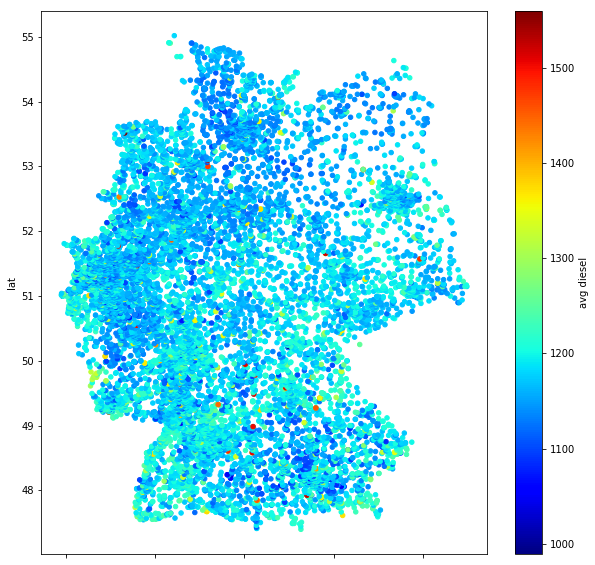

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
res = avg_dow[avg_dow['lng'] != 0]
res = res[res['dow'] == 0]
res.plot(kind="scatter", x="lng", y="lat", figsize=(10,10), c="avg diesel", cmap=plt.get_cmap("jet"), colorbar=True)

Prepare data for training

In [246]:
#Encode weekdays with onehot
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
weekday = avg_dow.replace([np.inf, -np.inf], np.nan).dropna()["dow"]
weekday_1hot = encoder.fit_transform(weekday.values.reshape(-1,1)).toarray()
print(weekday_1hot)

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


In [269]:
#split data into train and test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split((avg_dow[avg_dow['lng'] != 0].dropna), test_size = 0.2)

TypeError: Singleton array array(<bound method DataFrame.dropna of         dow        lat        lng   avg diesel
1       0.0  47.399570  11.266046  1226.867299
2       0.0  47.412920  10.275360  1189.517016
3       0.0  47.415369  10.275212  1177.512160
4       0.0  47.432440  10.269810  1113.091549
5       0.0  47.444924  11.263304  1198.978032
6       0.0  47.461820  10.267960  1193.795918
7       0.0  47.484642  11.237125  1209.555037
8       0.0  47.490085  11.112933  1216.641509
9       0.0  47.490556  11.075959  1205.473255
10      0.0  47.490580  11.076740  1208.413333
11      0.0  47.498931  11.087982  1210.365784
12      0.0  47.500454  11.101443  1218.850125
13      0.0  47.504010  10.359387  1184.987500
14      0.0  47.507964  10.275724  1192.054024
15      0.0  47.508600  11.279400  1215.814921
16      0.0  47.512030  10.290340  1202.852140
17      0.0  47.518950  10.281300  1124.185185
18      0.0  47.519035  10.281966  1185.181818
19      0.0  47.523360  10.270100  1097.461538
20      0.0  47.523716  10.262306  1198.297164
21      0.0  47.524601  10.261920  1126.619048
22      0.0  47.531280  11.112620  1214.653105
23      0.0  47.546730   7.737470  1168.285714
24      0.0  47.547695   9.728079  1215.712018
25      0.0  47.551609  10.251100  1095.923077
26      0.0  47.551793   7.664013  1230.682353
27      0.0  47.552914   9.701535  1167.646895
28      0.0  47.554178   7.935905  1234.560976
29      0.0  47.554400   8.016220  1237.312388
30      0.0  47.554810   9.704920  1189.851064
...     ...        ...        ...          ...
106805  6.0  54.777990   9.325244  1188.028832
106806  6.0  54.778006   9.415020  1181.070824
106807  6.0  54.778710   9.414560  1149.965147
106808  6.0  54.779850   8.834558  1141.169811
106809  6.0  54.781883   8.851878  1159.046296
106810  6.0  54.783500   9.673110  1145.937669
106811  6.0  54.791200   8.833720  1143.215385
106812  6.0  54.794100   9.372330  1142.692946
106813  6.0  54.796690   9.429070  1160.815941
106814  6.0  54.797090   9.476214  1193.500780
106815  6.0  54.797600   9.635370  1144.455202
106816  6.0  54.799000   9.475690  1150.988590
106817  6.0  54.799073   9.412012  1178.845830
106818  6.0  54.801380   9.441820  1173.530103
106819  6.0  54.803200   9.487980  1149.702599
106820  6.0  54.803235   9.456434  1183.072727
106821  6.0  54.808600   9.422040  1151.264510
106822  6.0  54.813000   9.172290  1189.614308
106823  6.0  54.816680   9.474240  1149.790960
106824  6.0  54.827200   9.536720  1149.702599
106825  6.0  54.834126   8.889995  1163.155251
106826  6.0  54.840400   9.027780  1141.560241
106827  6.0  54.869200   8.906220  1151.818740
106828  6.0  54.870800   8.906840  1151.264574
106829  6.0  54.900402   8.339205  1242.709677
106830  6.0  54.900900   8.810690  1153.291188
106831  6.0  54.901300   8.822810  1127.346883
106832  6.0  54.904569   8.310836  1230.604096
106833  6.0  54.907468   8.308741  1201.078212
106834  6.0  55.015890   8.429530  1180.347905

[106828 rows x 4 columns]>, dtype=object) cannot be considered a valid collection.

In [257]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import StandardScaler
weekday_df_1hot = pd.DataFrame(weekday_1hot[0:,0:], columns=['Su', 'Mo','Tu', 'Wd', 'Th', 'Fr', 'Sa'])
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
coords = avg_dow.replace([np.inf, -np.inf], np.nan).dropna(axis=0)[['lng', 'lat']]
print(coords.shape)
dow_std = num_pipeline.fit_transform(coords)
print(dow_std.shape, weekday_1hot.shape)
dow_prepared = np.concatenate((dow_std, weekday_1hot), axis=1)
dow_labels = avg_dow.replace([np.inf, -np.inf], np.nan).dropna(axis=0)['avg diesel'].values

(106811, 2)
(106811, 2) (106811, 7)


In [252]:
dow_prepared

array([[ -4.76344682, -28.31354002,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.82681034,  -1.92316265,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.33522797,  -1.91572985,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [ -0.6395767 ,   2.25535112,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       [ -0.64061625,   2.25696517,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       [ -0.58068027,   2.31733065,   0.        , ...,   0.        ,
          0.        ,   1.        ]])

In [259]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
print(dow_prepared.shape)
lin_reg.fit(dow_prepared, dow_labels)

(106811, 9)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [268]:
#Make prediction for location in Kaiserslautern
print(avg_dow.dropna(axis=0)[['lng', 'lat']].shape)
print(np.array([11.266046, 47.399570]).reshape(1,2).shape)
input = num_pipeline.transform(np.array([11.266046, 47.399570]).reshape(1,2))
input = np.concatenate((input, [[0,0,0,0,0,0,1]]), axis=1)
print("Predictions: ", lin_reg.predict(input))

(106811, 2)
(1, 2)
Predictions:  [ 1191.49414062]


In [274]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, dow_prepared, dow_labels, scoring="neg_mean_squared_error", cv=10)
lr_scores = np.sqrt(-scores)
print(lr_scores.mean(), lr_scores.std())

39.3529415776 1.78603090371


Error is around 4 euro-cents, which is okay but not satisfying

In [275]:
#now compare to decision tree:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, dow_prepared, dow_labels, scoring="neg_mean_squared_error", cv=10)
lr_scores = np.sqrt(-scores)
print(lr_scores.mean(), lr_scores.std())

8.09624670504 3.20516441626


Error is below one cent -> better performence